# Data Analysis

Once the simulation is complete we enter the **Post Processing** stage where we _measure_ physical quantities and calculate transport coefficients.

Sarkas was developed to make this process as simple and straightforward as possible.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/input_files/yukawa_mks_p3m.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/Post_Processing_Docs.ipynb)

Let's import the needed packages.

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PostProcess
from sarkas.tools.observables import Thermodynamics, RadialDistributionFunction, StaticStructureFactor, DynamicStructureFactor

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yukawa_mks_p3m.yaml')

Similar to the **Pre Processing** and **Simulation** stages three lines are enough. 
The `run` method will calculate everything that was included in the input YAML file. This was shown in the [Quickstart notebook](./Quickstart.ipynb) where we calculated the Radial Distribution Function. In this notebook we want to calculate the Radial Distribution Function and the Static Structure Function. 

Each observable is an object and it is stored as an attribute of the PostProcess. The class names are

  `therm` = [Thermodynamics](../../api/tools_subpckg/sarkas.tools.observables.Thermodynamics.rst#sarkas.tools.observables.Thermodynamics)
   
  `rdf` = [Radial Distribution Function](../../api/tools_subpckg/sarkas.tools.observables.RadialDistributionFunction.rst)

  `ssf` = [Static Structure Factor](../../api/tools_subpckg/sarkas.tools.observables.StaticStructureFactor.rst)

Other class names that we are not calculating here are:

  `dsf` = [Dynamic Structure Factor](../../api/tools_subpckg/sarkas.tools.observables.DynamicStructureFactor.rst)

  `ccf` = [Current Correlation Function](../../api/tools_subpckg/sarkas.tools.observables.CurrentCorrelationFunction.rst)

  `ec` = [Electric Current](../../api/tools_subpckg/sarkas.tools.observables.ElectricCurrent.rst)

  `vd` = [Velocity Distribution](../../api/tools_subpckg/sarkas.tools.observables.VelocityDistribution.rst)

  `vacf` = [Velocity AutoCorrelation Function](../../api/tools_subpckg/sarkas.tools.observables.VelocityAutoCorrelationFunction.rst)

  `diff_flux` = [Flux AutoCorrelation Function](../../api/tools_subpckg/sarkas.tools.observables.DiffusionFlux.rst) ( mixtures only)
    
  `p_tensor` = [Pressure Tensor](../../api/tools_subpckg/sarkas.tools.observables.PressureTensor.rst)
    
You can find more information for each observable on the [Observable page](../../api/tools_subpckg/sarkas.tools.observables.rst) and our [Examples page](../../examples/examples.rst) for more info on how to use them.

Let's run the postprocessing

In [23]:
# Let's initialize the class
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)






 _______              __                
|     __|.---.-.----.|  |--.---.-.-----.
|__     ||  _  |   _||    <|  _  |__ --|
|_______||___._|__|  |__|__|___._|_____|
                                        


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: yocp
Job directory: SarkasSimulations/yocp_pppm
PostProcessing directory: 
SarkasSimulations/yocp_pppm/PostProcessing

Equilibration dumps directory: 
SarkasSimulations/yocp_pppm/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_pppm/Simulation/Production/dumps

Equilibration H5MD file: 
SarkasSimulations/yocp_pppm/Simulation/Equilibration/dumps/yocp_data.h5md
Production H5MD file: 
SarkasSimulations/yocp_pppm/Simulation

As you can see Sarkas calculated the Radial distribution function, the Static structure function, and produced a plot of the temperature and energy of the production phase. 

On the left most part of the figure above we reproduce some useful info. The main plots show the Temperature (left) and Total Energy (right) as a function of time. The temperature plot shows the thermostating temperature as a red dashed line. In the energy plot, instead, the red dashed line represents the average value. The yellow-orange line shows the moving average.

The plots above the main plots indicate the percentage deviation from the desired temperature (left) and the percentage deviation of the total energy from its initial value. Also in these plots, the yellow-orange line shows the moving average of the percentage deviation.

The bar plots to the right of the main plots instead are histograms of the Temperature and Total Energy, respectively. 

Note that the Temperature oscillates around its desired value and has only $\sim \pm 2$% deviation from it. Similarly the Total Energy oscillates around its average value and stays within a $\sim -0.5$ % deviation. 

The bar plots are the next most important thing to notice. We want these to look like Maxwellian distributions. The orange line in the Temperature bar plot is a Maxwellian distribution with a centered at the desired Temperature (dashed red line) with a standard deviation obtained from the actual data. The orange line in the Energy bar plot is again a Maxwellian distribution centered at the dashed red line with a std equal to $k_BT$.

## Thermodynamics
We can create a similar plot for the equilibration phase by calling the method [temp_energy_plot](../../api/tools_subpckg/Thermodynamics_methods/sarkas.tools.observables.Thermodynamics.temp_energy_plot.rst#sarkas.tools.observables.Thermodynamics.temp_energy_plot)




=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_pppm/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 751
Total time per block: T = 3.7505e-14 [s] ~ 100 plasma periods
Time interval: dt = 5.0000e-17 [s] ~ 1.3e-01 plasma period



Thermodynamics calculation Time: 0 sec 34 msec 707 usec 334 nsec


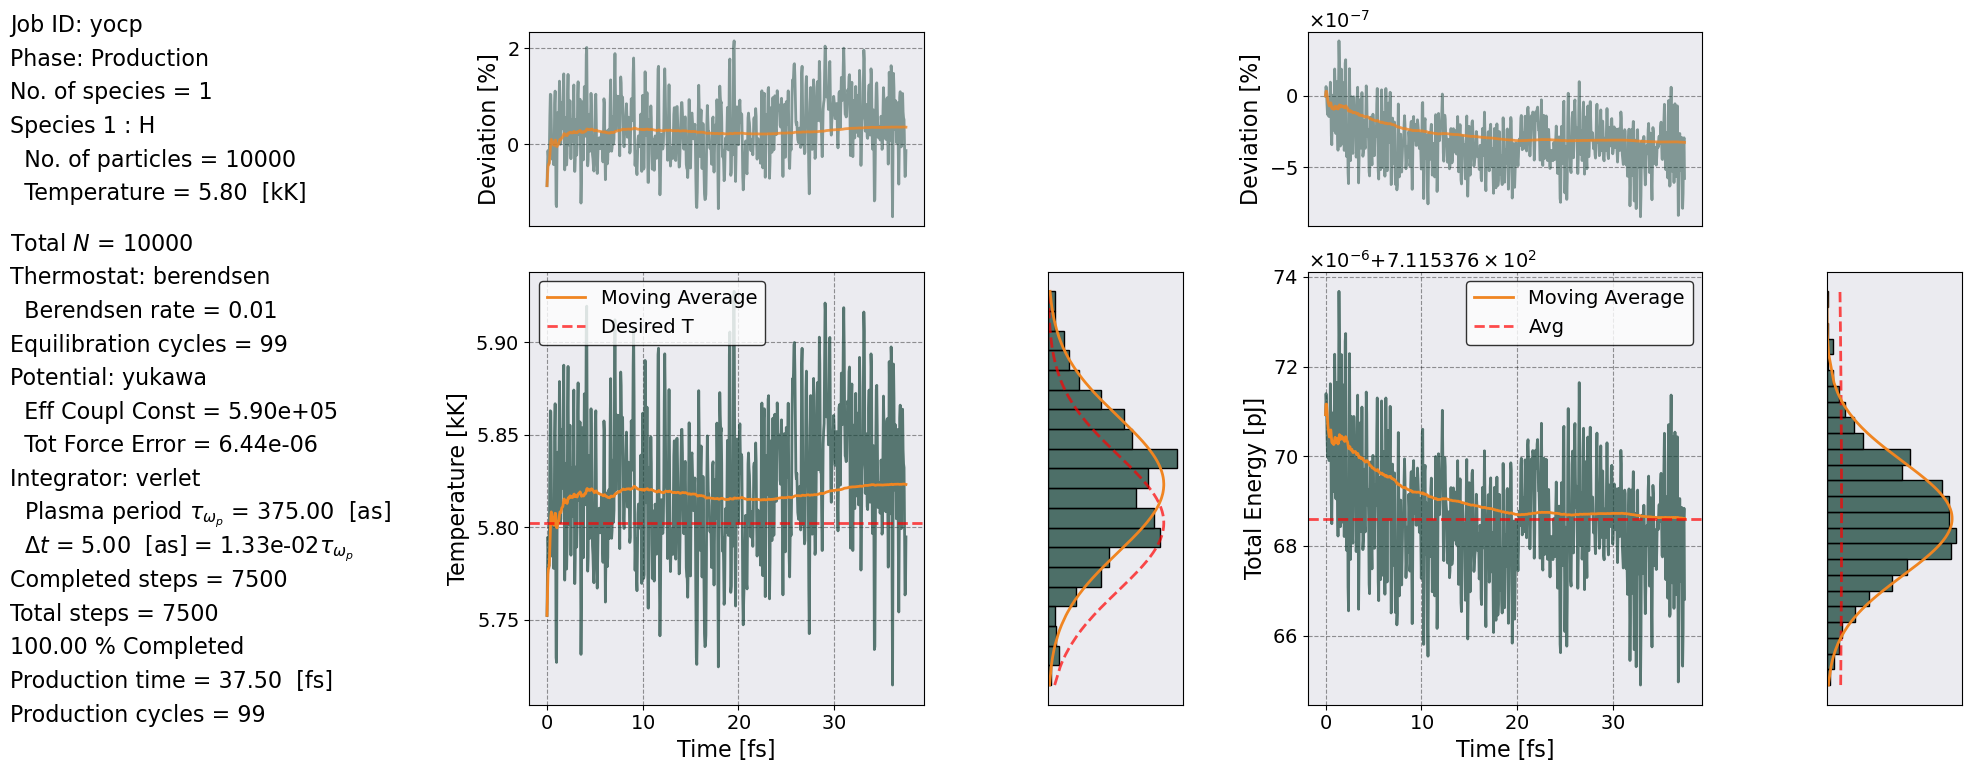

In [24]:
therm = Thermodynamics()
therm.setup(postproc.parameters)
therm.compute()
therm.temp_energy_plot(
    postproc, # Pass the Process class with simulation info
    phase = 'production' # Choose the simulation phase
)

We find a figure similar as before. In this case, the most important thing to pay attention to is the temperature plot. We want to see that the Moving Average has approached the desired temperature. 

In [12]:
tau_p = therm.plasma_period
- tau_p / np.log(0.01) * 5/ postproc.parameters.dt

203.57696107591613

## Radial Distribution Function
The RDF has been already calculated and the data saved on disk in the directory displayed above. 

As mentioned in the output the data is stored in a [pandas.DataFrame()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Let's take a look

In [25]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()
rdf.dataframe



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_pppm/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 500
dr = 0.0110 a_ws = 1.2540e-13 [m]
Maximum Distance (i.e. potential.rc)= 5.5100 a_ws = 6.2702e-11 [m]
Time Series Data:
No. of blocks = 1
No. dumps per block = 751
Total time per block: T = 3.7505e-14 [s] ~ 100 plasma periods
Time interval: dt = 5.0000e-17 [s] ~ 1.3e-01 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]

first dump_end 750

Radial Distribution Function Calculation Time: 0 sec 33 msec 534 usec 417 nsec


Interparticle   H-H RDF    
         Distance      Mean Std
0    0.000000e+00  0.000000 NaN
1    1.881060e-13  0.000000 NaN
2    3.135100e-13  0.000000 NaN
3    4.389140e-13  0.000000 NaN
4    5.643180e-13  0.000000 NaN
..            ...       ...  ..
495  6.213768e-11  0.885928 NaN
496  6.226309e-11  0.886158 NaN
497  6.238849e-11  0.887053 NaN
498  6.251389e-11  0.887580 NaN
499  6.263930e-11  0.888249 NaN

[500 rows x 3 columns]

This is a `pandas.DataFrame` with `MultiIndex`. There are two rows of columns this means that columns of data are called via tuples, _e.g._ `postproc.rdf.dataframe[("H-H RDF", "Mean")]`

As you can see there are three columns. The first is the distance between two particles and it is given in the same units as provided in the YAML. The next two columns are the Mean and Std of the RDF calculated for each slice. The Std column is full of `NaN` because we only had one slice as such no std.

Let's plot it!. This can be done by calling the [plot()](../../api/tools_subpckg/Observable_methods/sarkas.tools.observables.Observable.plot.rst) method of the [Observable](../../api/tools_subpckg/sarkas.tools.observables.Observable.rst#sarkas.tools.observables.Observable) class. We reproduce here the docs for convenience 

    def plot(self, scaling=None, acf=False, longitudinal=True, figname=None, show=False, **kwargs):
        """
        Plot the observable by calling the pandas.DataFrame.plot() function and save the figure.

        Parameters
        ----------
        scaling : float, tuple
            Factor by which to rescale the x and y axis.

        acf : bool
            Flag for renormalizing the autocorrelation functions. Default= False

        longitudinal : bool
            Flag for longitudinal plot in case of CurrenCurrelationFunction. Default = True

        figname : str
            Name with which to save the file. It automatically saves it in the correct directory.

        show : bool
            Flag for prompting the plot to screen. Default=False

        **kwargs :
            Options to pass to matplotlib plotting method.

        Returns
        -------
        axes_handle : matplotlib.axes.Axes
            Axes. See `pandas` documentation for more info

        """

This method takes the first column of the dataframe as the $x$ axis and all the other columns as $y$ axis. As you can see this method is a wrapper for the `pandas.DataFrame.plot()` method, as such you can pass the same parameters. We have added other parameters specific for our plots. In particular the parameter `scaling` is used for rescaling the $x$ and $y$ axis. 

In the following we want to plot the RDF as a function of $r/a_{ws}$ and relabel the x-axis.

<Axes: xlabel='$r/a_{ws}$'>

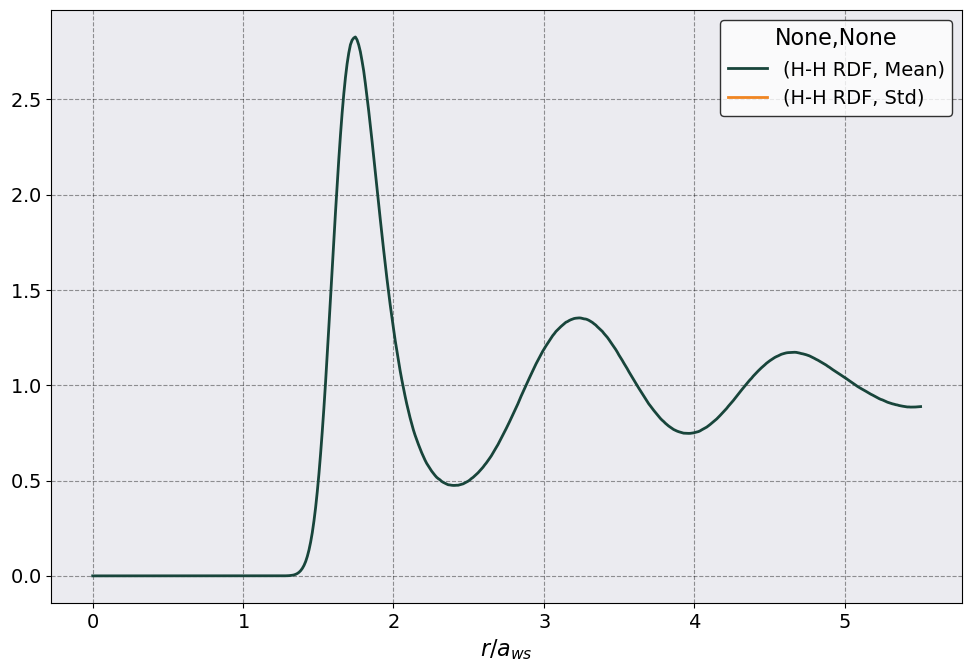

In [27]:
# Plot
rdf.plot(
    scaling=rdf.a_ws,
    xlabel = r'$r/a_{ws}$')

In [29]:
from sarkas.tools.observables import VelocityAutoCorrelationFunction

vacf = VelocityAutoCorrelationFunction()
vacf.setup(postproc.parameters)
vacf.compute_acf()



================= Velocity AutoCorrelation Function ==================
Data saved in: 
 SarkasSimulations/yocp_pppm/PostProcessing/VelocityAutoCorrelationFunction/Production/VelocityAutoCorrelationFunction_yocp.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 751
Total time per block: T = 3.7505e-14 [s] ~ 100 plasma periods
Time interval: dt = 5.0000e-17 [s] ~ 1.3e-01 plasma period

Data file not found! 
 SarkasSimulations/yocp_pppm/PostProcessing/VelocityAutoCorrelationFunction/Production/VelocityAutoCorrelationFunction_yocp_raw.h5



Calculating Velocity AutoCorrelation Function for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Velocity AutoCorrelation Function Calculation Time: 0 sec 30 msec 76 usec 917 nsec


In [30]:
vacf.dataframe_acf

VACF                                                        \
          Species             H                                           
             Axis             X                 Y                 Z       
             Time          Mean Std          Mean Std          Mean Std   
0    0.000000e+00  4.629808e+07 NaN  4.486421e+07 NaN  4.666212e+07 NaN   
1    5.000000e-17  4.175757e+07 NaN  4.025375e+07 NaN  4.204215e+07 NaN   
2    1.000000e-16  2.977224e+07 NaN  2.819581e+07 NaN  2.990530e+07 NaN   
3    1.500000e-16  1.462856e+07 NaN  1.307484e+07 NaN  1.466552e+07 NaN   
4    2.000000e-16  1.329072e+06 NaN -2.188651e+04 NaN  1.463481e+06 NaN   
..            ...           ...  ..           ...  ..           ...  ..   
746  3.730000e-14 -1.931283e+06 NaN  2.996724e+06 NaN -4.468963e+06 NaN   
747  3.735000e-14 -1.028322e+06 NaN  1.050472e+07 NaN -2.386654e+06 NaN   
748  3.740000e-14  1.374263e+06 NaN  1.639258e+07 NaN -5.628243e+05 NaN   
749  3.745000e-14  4.496556e+06 NaN  1.987027e+07 NaN  3.662356e+05 NaN   
750  3.750000e-14  7.234271e+06 NaN  2.110025e+07 NaN -6.276720e+04 NaN   

                       
                       
            Total      
             Mean Std  
0    4.594147e+07 NaN  
1    4.135116e+07 NaN  
2    2.929111e+07 NaN  
3    1.412297e+07 NaN  
4    9.235555e+05 NaN  
..            ...  ..  
746 -1.134507e+06 NaN  
747  2.363249e+06 NaN  
748  5.734674e+06 NaN  
749  8.244354e+06 NaN  
750  9.423917e+06 NaN  

[751 rows x 9 columns]

<Axes: xlabel='Plasma Periods'>

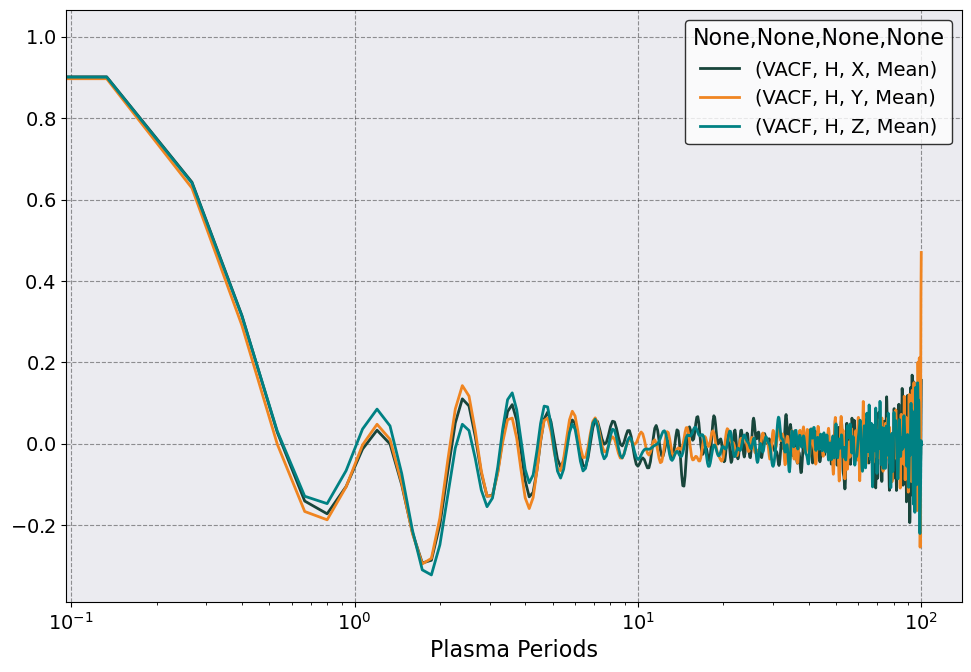

In [33]:
vacf.plot(
    y = [
        ("VACF", "H", "X", "Mean"), 
        ("VACF", "H", "Y", "Mean"),
        ("VACF", "H", "Z", "Mean")
    ],
    scaling = vacf.plasma_period,
    acf = True,
    xlabel = 'Plasma Periods'
             )



======================= Diffusion Coefficients =======================
Data saved in: 
 SarkasSimulations/yocp_pppm/PostProcessing/TransportCoefficients/Diffusion/Production/Diffusion_yocp.h5 
 SarkasSimulations/yocp_pppm/PostProcessing/TransportCoefficients/Diffusion/Production/Diffusion_slices_yocp.h5 
No. of slices = 1
No. dumps per block = 751
Total time interval of autocorrelation function: tau = 3.7550e-14 [s] ~ 100 plasma periods
Time interval step: dtau = 5.0000e-17 ~ 1.3333e-01 plasma periods


  0%|          | 0/1 [00:00<?, ?it/s]


Diffusion Calculation Time: 0 sec 671 msec 83 usec 292 nsec


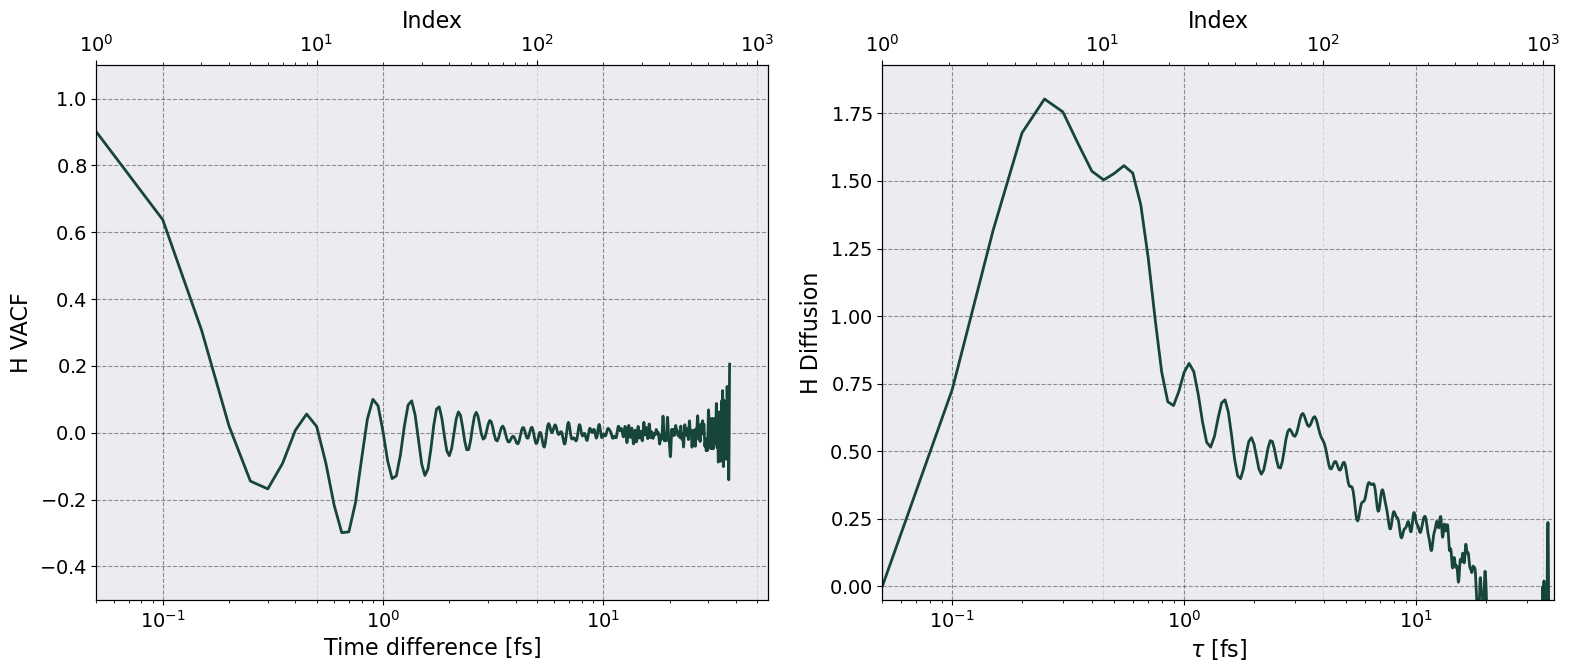

In [35]:
from sarkas.tools.transport import Diffusion

diff = Diffusion()
diff.setup(postproc.parameters, vacf, therm)
diff.compute(vacf)

Nice!

## Static Structure Factor

The next observable we want to measure is the Static Structure Factor. [Here](https://en.wikipedia.org/wiki/Structure_factor) you can find a long Wikipedia article about it.
In short it is the correlation function of the density fluctuations and Sarkas calculates it by

$$ S(\mathbf k) = \langle n(-\mathbf k) n(\mathbf k) \rangle. $$

For each timestep Sarkas calculates 

$$ n(\mathbf k, t) = \sum_j^N e^{- i \mathbf k \cdot \mathbf r_i(t)} $$

then takes the product $n(-\mathbf k,t) n(\mathbf k,t)$ and averages over the time length of each slice

$$  \langle n(-\mathbf k) n(\mathbf k) \rangle  = \frac{1}{M} \sum_{m}^M n(-\mathbf k, m \Delta t) n(\mathbf k, m \Delta t) $$

where $M$ is the total number of saved (slice) timesteps and $\Delta t$ is our snapshot timestep.

Notice that $\mathbf k$ is a vector, as such there are multiple directions we need to consider. The first important thing to understand is that even though we are using periodic boundary conditions to simulate an infinite system, the number of wavelengths that can fit into the simulation box are finite and given by 

$$ \mathbf k (n_x, n_y , n_z) = 2\pi \left ( \frac{n_x}{L_x} , \frac{n_y}{L_y} ,  \frac{n_z}{L_z} \right ), \quad n_x, n_y, n_z = 0, 1, 2, \dots $$

where $n_{x,y,z}$ can take only integer values. This means that the minimum value is 

$$ k_{\rm min} = \frac{2\pi}{L}, $$ 

with $ L = L_x = L_y = L_z$. The calculation of $S(\mathbf k)$ for every combination of the triplet $n_x, n_y, n_z$ can be very slow. Therefore, it is often the case that researchers calculate only multiple integers of $k_{\rm min}$ along the three principal axis, that is

$$ \mathbf k(n_x,0,0), \quad \mathbf k(0, n_y, 0), \quad \mathbf k (0, 0, n_z). $$

This is the default way in Sarkas and it corresponds to the choice `angle_averaging = 'principal_axis'`. If we wanted to calculate every possible combination of the triplet then we would choose `angle_averaging = 'full'`.

In the YAML file we passed the value `angle_averaging = 'custom'`, in order to show this feature.
Sarkas calculated $S(\mathbf k)$ up to $ka = 12$, where $a = a_{\rm ws}$ for brevity. It calculated every possible combination of the triplet up to `max_aa_ka_value = 4.1` and then used multiples of the principal axis for the rest.

Same as before let's take a look at the data

In [6]:
postproc.ssf.dataframe

Inverse Wavelength   H-H SSF          
                   NaN      Mean       Std
0         1.589833e+10  0.020323  0.010770
1         2.248364e+10  0.009977  0.005976
2         2.753672e+10  0.011418  0.003642
3         3.179666e+10  0.001656  0.001383
4         3.554975e+10  0.003375  0.001673
..                 ...       ...       ...
422       9.856965e+11  0.999040  0.002366
423       1.001595e+12  1.095194  0.015077
424       1.017493e+12  0.960260  0.018005
425       1.033392e+12  0.966948  0.064647
426       1.049290e+12  1.004454  0.052012

[427 rows x 3 columns]

Note that in this case the Std column is not `NaN`, because we have chosen to divide the simulation into two slices.

As you can see Sarkas will calculate 2902 different combinations which correspond to 427 unique values of $ka$. This means that our $S(k)$ will be an array with 427 elements. 

Let's compute it! Again a progress bar will show up in your notebook, but does not display on the webpage. 

In [7]:
postproc.ssf.parse()

As you can see Sarkas calculates $n(\mathbf k, t)$ first for each slice, only one in this case. This is the slow part of the calculation. Then computes $S(k)$ by averaging over all the configurations. 

Let's take a look at the dataframe

In [8]:
postproc.ssf.dataframe

Inverse Wavelength   H-H SSF          
                   NaN      Mean       Std
0         1.589833e+10  0.020323  0.010770
1         2.248364e+10  0.009977  0.005976
2         2.753672e+10  0.011418  0.003642
3         3.179666e+10  0.001656  0.001383
4         3.554975e+10  0.003375  0.001673
..                 ...       ...       ...
422       9.856965e+11  0.999040  0.002366
423       1.001595e+12  1.095194  0.015077
424       1.017493e+12  0.960260  0.018005
425       1.033392e+12  0.966948  0.064647
426       1.049290e+12  1.004454  0.052012

[427 rows x 3 columns]

Let's plot it! This time, though, let's plot also the std as a shaded area around the mean.

[(0.0, 3.0)]

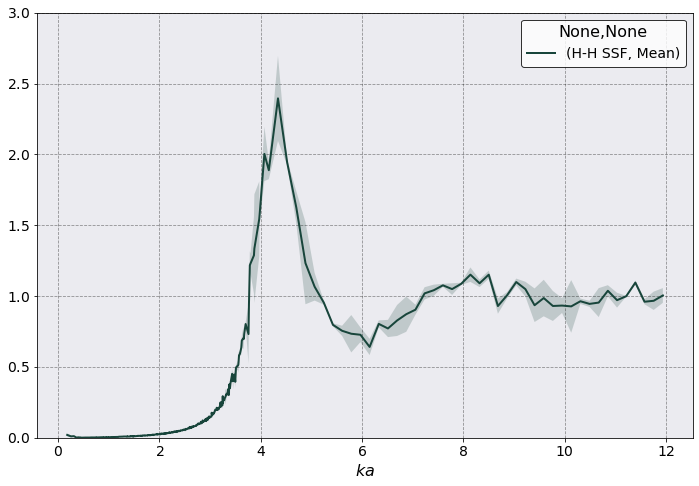

In [9]:
# Get the axes handle for the errorbar plot
ax = postproc.ssf.plot(
    scaling = 1./postproc.ssf.a_ws, # Need to divide because a_ws multiplies k
    y = ('H-H SSF', "Mean"), # I want only the second column. Otherwise it will plot all the columns
    xlabel = r'$ka$'
)
# Errorbar plot
ax.fill_between( 
    postproc.ssf.dataframe[('Inverse Wavelength')].iloc[:,0] * postproc.ssf.a_ws,
    postproc.ssf.dataframe[("H-H SSF", "Mean")] + postproc.ssf.dataframe[("H-H SSF", "Std")],
    postproc.ssf.dataframe[("H-H SSF", "Mean")] - postproc.ssf.dataframe[("H-H SSF", "Std")],
    alpha = 0.2
)
ax.set(ylim = (0, 3))

As you can see $S(\mathbf k)$ is quite noisy for $ka > 4.0$. There are two reasons for this. 

- Slice averaging 
- Angle averaging

Slice averaging it actually not that significant here and it contributes only to the shaded areas. As a matter of fact notice how smooth is the plot for $ka < 4.0$. 

Principal axis averaging is the culprit here. For each $k$ value there are only $3 \times 1500$ configuration on which to average, where $1500$ is the number of snapshots and $3$ comes from the three principal directions of $k$. For example $ka =  6.15$ corresponds to the three directions 

$$ ka = \frac{2 \pi}{L} |(34, 0, 0)| = \frac{2 \pi}{L}  |(0,34,0)| = \frac{2 \pi}{L}  |(0, 0, 34)|$$

To reduce the noise we could choose among: increasing the number of snapshots, use the `angle_averaging = 'full'`, or increasing the number of particles. All these options are rather slow. More importantly we don't know which is the most effective. 

Probably, `angle_averaging = 'full'` will be more effective for the large $ka$ value, but it definitely won't reduce any noise at low $ka$ values. However, assuming we don't want to restart the simulation (_i.e._ increase the number of particles) let's take a look at what it would take to do the full angle averaging.

The following code computes

In [10]:
postproc.ssf.angle_averaging = 'full'
# Re-Initialize the class with the new parameters. 
postproc.ssf.setup(postproc.parameters)
# Check
postproc.ssf.pretty_print()



===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/yocp_pppm/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/yocp_pppm/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_yocp.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 1.5898e+10 [1/m]

Angle averaging choice: full
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 66, 66, 66
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	k_max = 20.6818 / a_ws = 1.8174e+12 [1/m]

Total number of k values to calculate = 300762
No. of unique ka values to calculate = 14344


Notice that we now have 300 762 combinations of $(n_x, n_y, n_z)$ to calculate. This will be rather slow.